In [1]:
import torch
import pickle
import torchvision
import numpy as np
from torchvision import transforms
import torchvision.datasets as dset
from torchvision import transforms
# from dataset import CT_MRI_Train, CT_MRI_Test
from dataset import CT_MRI_Train

from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from PIL import Image
from siamese_model import Siamese
import SimpleITK as sitk
from osirix import ViewerController

import grpc
import pytest
import numpy as np
import matplotlib.pyplot as pl
from osirix.osirix_utils import Osirix, OsirixService
from osirix.Exceptions import GrpcException

import osirix.pb2.osirix_pb2 as osirix_pb2
import osirix.pb2.utilities_pb2 as utilities_pb2
import osirix.pb2.types_pb2 as types_pb2
import osirix.pb2.viewercontroller_pb2 as viewercontroller_pb2
import osirix.pb2.vrcontroller_pb2 as vrcontroller_pb2
import osirix.pb2.dcmpix_pb2 as dcmpix_pb2
import osirix.pb2.roi_pb2 as roi_pb2
import osirix.pb2.roivolume_pb2 as roivolume_pb2
import osirix.pb2.osirix_pb2_grpc as osirix_pb2_grpc

In [2]:
# pwd

'/Users/admintmun/dev/SIameseNN_CT_MRI_Slice_Sync'

In [3]:
siamese_nn = Siamese()
# siamese_nn.double()

# siamese_nn.load_state_dict(torch.load("//home//timothysumhonmun//models//model-inter-10.pt"), strict=False)
checkpoint = torch.load("/Users/admintmun/models/model12-8exa-2way-ep5000-lr00005-contrastive-loss-best-86.pt", map_location=torch.device('cpu'))
# siamese_nn.load_state_dict(torch.load("//home//timothysumhonmun//models//model3-best-19.pt"), strict = True)

state_dict = checkpoint['model_state_dict']

print(state_dict.items())

from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove 'module.' of dataparallel
    new_state_dict[name]=v

siamese_nn.load_state_dict(state_dict)

siamese_nn.eval()

odict_items([('conv.0.weight', tensor([[[[-0.0755, -0.0479, -0.0176,  ...,  0.0770,  0.0170,  0.0881],
          [ 0.0358,  0.0078, -0.0588,  ...,  0.0419, -0.0381,  0.0728],
          [ 0.0478,  0.0295, -0.0143,  ..., -0.0040,  0.0262, -0.0310],
          ...,
          [ 0.0051,  0.0241, -0.0157,  ..., -0.0071, -0.0697, -0.1314],
          [ 0.0276,  0.0387, -0.0330,  ...,  0.0247,  0.0406, -0.1286],
          [ 0.0834, -0.0626,  0.0244,  ...,  0.0339, -0.0572, -0.0152]]],


        [[[-0.0670,  0.0611,  0.0825,  ...,  0.0945,  0.0327, -0.0182],
          [ 0.0525, -0.0117,  0.0210,  ..., -0.0542,  0.0277,  0.0723],
          [ 0.0396, -0.0914,  0.0628,  ..., -0.0557, -0.0200, -0.1149],
          ...,
          [-0.0323, -0.0711, -0.0134,  ..., -0.0649,  0.0097, -0.0635],
          [-0.0833, -0.0323, -0.0803,  ...,  0.0901,  0.0253, -0.0275],
          [-0.1198, -0.0841, -0.0415,  ..., -0.0978, -0.1023, -0.0849]]],


        [[[ 0.0681,  0.0790,  0.0431,  ...,  0.0250,  0.0209,  0.06

Siamese(
  (conv): Sequential(
    (0): Conv2d(1, 64, kernel_size=(10, 10), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
    (10): ReLU()
  )
  (linear): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): Sigmoid()
  )
  (out): Linear(in_features=4096, out_features=1, bias=True)
)

In [4]:
port = 50051
domain = "localhost:"
# address
channel_opt = [('grpc.max_send_message_length', 512 * 1024 * 1024),
               ('grpc.max_receive_message_length', 512 * 1024 * 1024)]

osirix_service = OsirixService(channel_opt=channel_opt, domain=domain, port=port).get_service()
osirix = Osirix(osirix_service)
browser_controller = osirix.current_browser()
study_series = browser_controller.database_selection()
study_tuple, series_tuple = study_series
print("Studies: ", study_tuple)
print("Series: ", series_tuple)
study = study_tuple[0]
series = study.series
viewers = osirix.displayed_2d_viewers()
print(viewers[0].modality)
print(viewers[1].modality)

Response Processor Started
Response Processor Started
Response Processor Started
osirixrpc_uid: "EAE7B2A9-DEC0-43D3-A4AB-97683E888E2F"

Studies:  (<osirix.Dicom.DicomStudy object at 0x171cc8a90>,)
Series:  ()
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
CT
MR


In [5]:
# print(series[10].name)
print(viewers[0].modality)
print(viewers[1].modality)

mri = viewers[0]
ct = viewers[1]

mri_dcm_pictures = mri.pix_list(movie_idx=0)
ct_dcm_pictures = ct.pix_list(movie_idx=0)

print(len(mri_dcm_pictures))
print(len(ct_dcm_pictures))

CT
MR
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Started
Response Processor Sta

In [6]:
mri_pix = mri_dcm_pictures[75]
ct_pix = ct_dcm_pictures[162]
ct_image_np = ct_pix.image
# ct_image_tensor = transforms.Resize((105,105))(transforms.ConvertImageDtype(torch.double)(transforms.ToTensor()(ct_image_np))).unsqueeze(0)
ct_image_tensor = transforms.Resize((105,105))(torch.from_numpy(ct_image_np).float()).unsqueeze(0)
# ct_image_tensor = ct_image_tensor.astype(torch.float32)
print(ct_image_tensor.dtype)
mri_image_np = mri_pix.image
mri_image_tensor = transforms.Resize((105,105))(torch.from_numpy(mri_image_np).float()).unsqueeze(0)
print(mri_image_tensor.dtype)
# mri_image_tensor = mri_image_tensor.astype(torch.float32)
# mri_image_tensor = transforms.Resize((105,105))(transforms.ConvertImageDtype(torch.double)(transforms.ToTensor()(mri_image_np))).unsqueeze(0)

# print(ct_image_np.shape)
# plt.imshow(ct_image_np, cmap='gray')
# siamese_nn = siamese_nn.float()
output = siamese_nn.forward(ct_image_tensor, mri_image_tensor)
output_distance = siamese_nn.forward_distance(ct_image_tensor, mri_image_tensor)
feature1, feature2 = siamese_nn.forward_features(ct_image_tensor, mri_image_tensor)

print("Logits :"  + str(output.item()))
# print(torch.mean(output_distance))
print("Mean distance between features :" + str(torch.mean(output_distance).item()))
print("Sum distance between features :" + str(torch.sum(output_distance).item()))

# prediction = F.softmax(output, dim=1)
# prediction = torch.softmax(output, 1)
prediction = torch.nn.Sigmoid()(output)

print("Sigmoid Predictions :" + str(prediction.item()))

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(ct_image_np,
#            aspect=6.711409396,
#            origin='lower',
          cmap=plt.cm.Greys_r)
ax1.set_title("Prediction : " + str(prediction))

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mri_image_np,
#            aspect=6.711409396,
#            origin='lower',
          cmap=plt.cm.Greys_r)
print(output)

prediction = np.argmax(output)

print(prediction)

# self.pix_pyosirix.set_image(response.image_data_argb, response.is_argb)
# if response.is_argb:
#     request = dcmpix_pb2.DCMPixSetImageRequest(pix=self.pix, image_data_argb=response.image_data_argb)
#     array = np.array(response.image_data_argb).reshape(response.rows, response.columns, 4)
#
#
# else:
#     request = dcmpix_pb2.DCMPixSetImageRequest(pix=self.pix, image_data_float=response.image_data_float)
#     array = np.array(response.image_data_float).reshape(response.rows, response.columns)
#
#     self.pix_pyosirix.set_image(response.image_data_float, response.is_argb)
# if response.is_argb:
#     array = np.array(response.image_data_argb).reshape(response.rows, response.columns, 4)
#     print("Numpy output:\n", array)
#
# else:
#     array = np.array(response.image_data_float).reshape(response.rows, response.columns)
#     print("Numpy output:\n", array)

ValueError: size shape must match input shape. Input is 1D, size is 2

# Test a couple of images

(105, 105)
(105, 105)


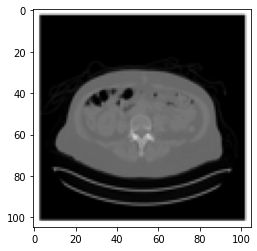

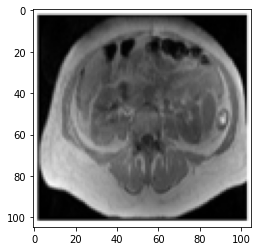

In [50]:
image1 = Image.open("//home//timothysumhonmun//data//Matching_Slices_Same_Patient_three_z_points_jpg_plt//Lymphoma_1031/CT_Matching_Same_Patient_Sample_Slice_100/CT_Matching_Slice_100.jpg").convert('L')

image2 = Image.open("//home//timothysumhonmun//data//Matching_Slices_Same_Patient_three_z_points_jpg_plt//Lymphoma_1031/CT_Matching_Same_Patient_Sample_Slice_100/MRI_Matching_Slice_100.jpg").convert('L')

image1 = image1.resize((105,105))
image2 = image2.resize((105,105))
# image1_plt = image1.reshape((1,))
# image2_plt = image2.reshape((1,))
print(image1.size)
print(image2.size)



plt.imshow(image1, cmap='gray')
plt.show()

plt.imshow(image2, cmap='gray')
plt.show()

In [52]:

image1_tensor = transforms.Resize((105,105))(transforms.ToTensor()(image1)).unsqueeze(0)
image2_tensor = transforms.Resize((105,105))(transforms.ToTensor()(image2)).unsqueeze(0)

print(image1_tensor.shape)
print(image2_tensor.shape)


output = siamese_nn.forward(image1_tensor, image2_tensor).data.cpu().numpy()

print(output)

prediction = np.argmax(output)

print(prediction)

torch.Size([1, 1, 105, 105])
torch.Size([1, 1, 105, 105])
[[0.01303982]]
0


In [35]:
fixed = sitk.ReadImage("/Users/admintmun/ICR_Files/Matching_Slices_Different_Patient_three_z_points_jpg_n_way_examples_fixed/Lymphoma_1031/CT_Lymphoma_1031_Matching_Different_Patients_Sample_Slice_200/MRI_Matching_Slice_Lymphoma_1001_Slice_200.jpg", sitk.sitkInt16)

moving = sitk.ReadImage("/Users/admintmun/ICR_Files/Matching_Slices_Different_Patient_three_z_points_jpg_n_way_examples_fixed/Lymphoma_1031/CT_Lymphoma_1031_Matching_Different_Patients_Sample_Slice_200/MRI_Matching_Slice_Lymphoma_1002_Slice_200.jpg", sitk.sitkInt16)

print(fixed.GetSize())
print(moving.GetSize())
matcher = sitk.HistogramMatchingImageFilter()
if (fixed.GetPixelID() in (sitk.sitkUInt8, sitk.sitkInt8)):
    matcher.SetNumberOfHistogramLevels(128)
else:
    matcher.SetNumberOfHistogramLevels(1024)
matcher.SetNumberOfMatchPoints(10)
# matcher.SetThresholdAtMeanIntensity(True)
matcher.ThresholdAtMeanIntensityOff()
moving_match = matcher.Execute(moving, fixed)

(330, 231)
(330, 231)


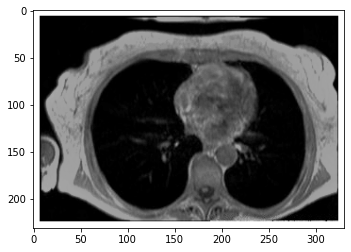

In [37]:
fixed = sitk.GetArrayFromImage(fixed)
moving = sitk.GetArrayFromImage(moving)
moving_match = sitk.GetArrayFromImage(moving_match)

plt.imshow(moving_match, cmap='gray')

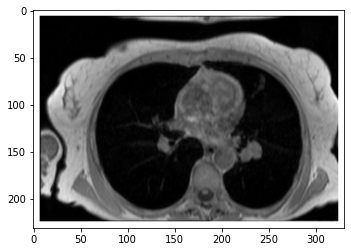

In [38]:

plt.imshow(fixed, cmap='gray')

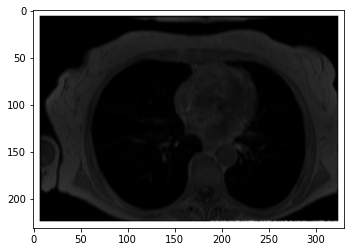

In [28]:
plt.imshow(moving, cmap='gray')